In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import mesa

In [64]:
class MoneyAgent(mesa.Agent):
    def __init__(self,model):
        super().__init__(model)
        self.wealth = 1

In [65]:
class MoneyModel(mesa.Model):
    def __init__(self, n = 10, seed = None):
        super().__init__(seed = seed)
        self.num_agents = n
        MoneyAgent.create_agents(model = self, n = n)

In [66]:
class MoneyAgent(mesa.Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def say_hi(self):
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")
    
    def printWealth(self):
        print("Wealth: ", self.wealth)

    def exchange(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):

    def __init__(self, n=10, seed=42):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        self.agents.shuffle_do("exchange")

In [78]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(30):  # Runs the model for 30 steps;
    model.step()

# Note: An underscore is common convention for a variable that is not used.

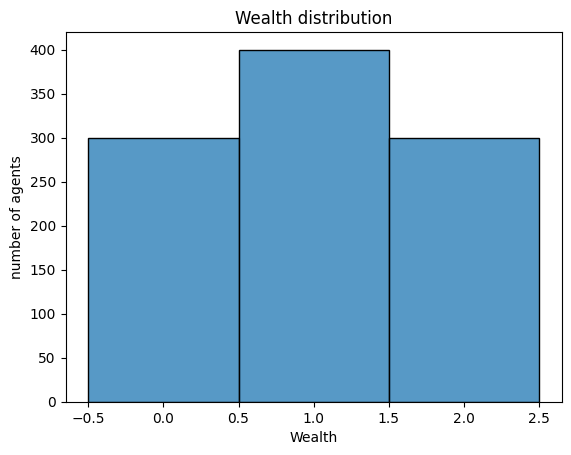

In [81]:
all_wealth = []
for _ in range(100):
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    for agent in model.agents:
        all_wealth.append(agent.wealth)

g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

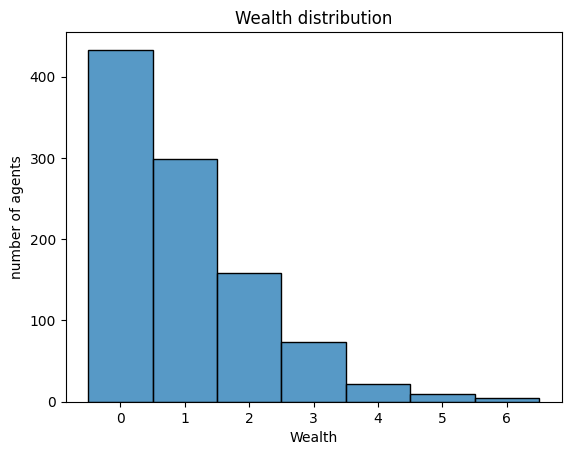

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import mesa

class MoneyAgent(mesa.Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def say_hi(self):
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")
    
    def printWealth(self):
        print("Wealth: ", self.wealth)

    def exchange(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        self.agents.shuffle_do("exchange")

model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(30):  # Runs the model for 30 steps;
    model.step()

all_wealth = []
for _ in range(100):
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    for agent in model.agents:
        all_wealth.append(agent.wealth)

g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");